<a href="https://colab.research.google.com/github/awero-manaxiy/schelling_model/blob/main/schelling_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt
import matplotlib.colors as col
from tqdm import tqdm




In [ ]:
def create_grid():
    reds, blues, holes = 45, 45, 10
    numbrs = ([1] * reds + [2] * blues + [0] * holes) * 100
    random.shuffle(numbrs)

    grid = np.reshape(numbrs, (100, 100))
    grid = np.pad(grid, 2, mode='constant', constant_values=10)

    return grid




In [ ]:
def get_happiness(cells):
    cells = cells.flatten()
    if cells[4] in [0, 10]:
        return 2
    elif sum(x == cells[4] for x in np.delete(cells, 4)) >= 4:
        return 0
    else:
        return 1


def get_unhappy_and_holes_indeces(grid):
    hole_indeces = np.argwhere(grid == 0)
    unhappy_indeces = np.argwhere(generic_filter(grid, get_happiness, size=(3, 3), mode='constant', cval=10) == 1)
    return hole_indeces.tolist(), unhappy_indeces.tolist()




In [ ]:
def get_state(grid, generations):
    hole_indeces, unhappy_indeces = get_unhappy_and_holes_indeces(grid)

    for i in tqdm(range(generations), ncols=80, ascii=True, desc='Total'):

        if len(unhappy_indeces) == 0:
            break
        if len(unhappy_indeces) < 10:
          hole_indeces, unhappy_indeces = get_unhappy_and_holes_indeces(grid)
          
        index = unhappy_indeces[np.random.randint(len(unhappy_indeces))]
        new_index = hole_indeces[np.random.randint(len(hole_indeces))]

        grid[new_index[0], new_index[1]], grid[index[0], index[1]] = grid[index[0], index[1]], grid[
            new_index[0], new_index[1]]
        unhappy_indeces.remove(index)
        hole_indeces.remove(new_index)
        hole_indeces.append(index)

        check_for_unhappy_area = grid[index[0] - 2:index[0] + 3, index[1] - 2:index[1] + 3]
        unhappy_append_list = np.argwhere(
            (generic_filter(check_for_unhappy_area, get_happiness, size=(3, 3), mode='constant', cval=10) == 1)[1:4, 1:4])
        unhappy_append_list = (unhappy_append_list + index - 1).tolist()
        for pos in unhappy_append_list:
            if pos not in unhappy_indeces:
                unhappy_indeces.append(pos)

        check_for_happy_area = grid[new_index[0] - 2:new_index[0] + 3, new_index[1] - 2:new_index[1] + 3]
        happy_append_list = np.argwhere(
            (generic_filter(check_for_happy_area, get_happiness, size=(3, 3), mode='constant', cval=10) == 0)[1:4, 1:4])
        happy_append_list = (happy_append_list + new_index - 1).tolist()
        for pos in happy_append_list:
            if pos in unhappy_indeces:
                unhappy_indeces.remove(pos)

    return grid




In [ ]:
def displaying_state(grid):
    grid = grid[2:102, 2:102]
    cmap = col.ListedColormap(['white', 'blue', 'red'])
    plt.figure(figsize=(12, 12))
    plt.pcolormesh(grid, edgecolor='black', cmap=cmap)
    plt.show()



Total: 100%|#############################| 10000/10000 [00:27<00:00, 365.63it/s]


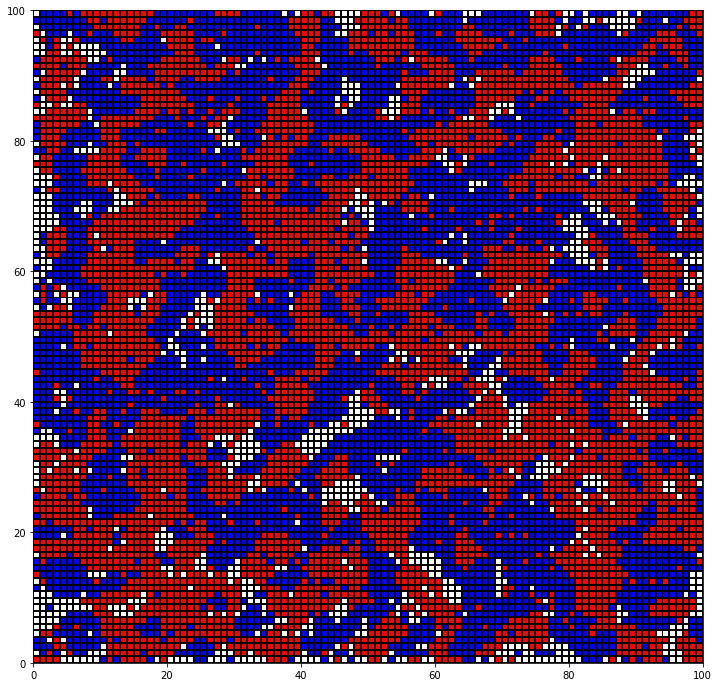

In [ ]:
if __name__ == "__main__":
    grid = create_grid()
    new_grid = get_state(grid, 10000)
    displaying_state(grid)